# Grover's Search Algorithm

**Course**: Quantum Computing Laboratory  
**Version**: 2.2 (Qiskit 2.2)  
**Last Updated**: November 2025

---

## 🎯 Quantum Search in √N Steps

Grover's algorithm provides **quadratic speedup** for unstructured search:
- Classical: O(N) queries
- Quantum: O(√N) queries

## 📚 Theory

### The Problem
Given N items, find the ONE marked item.

**Classical**: Check N/2 items on average  
**Quantum**: Check √N items!

### How It Works
1. **Superposition**: Create equal amplitudes for all states
2. **Oracle**: Mark the target (phase flip)
3. **Diffusion**: Amplify marked amplitude
4. **Repeat**: ~√N times
5. **Measure**: Find target with high probability

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import numpy as np

print('✓ Qiskit 2.2 ready')

✓ Qiskit 2.2 ready


## 🔨 Implementation: 2-Qubit Example

### Oracle: Mark |11⟩

In [2]:
def oracle_2q():
    """Oracle marks |11⟩"""
    qc = QuantumCircuit(2)
    qc.cz(0, 1)  # Phase flip on |11⟩
    return qc

# Diffusion operator
def diffusion_2q():
    """Inversion about average"""
    qc = QuantumCircuit(2)
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])
    return qc

print('✓ Oracle and diffusion defined')

✓ Oracle and diffusion defined


### Complete Grover Circuit

Circuit depth: 7
Gates: 12


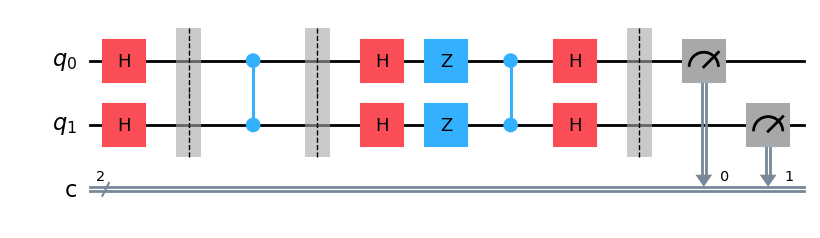

In [3]:
# Build circuit
qc = QuantumCircuit(2, 2)

# Initialize: superposition
qc.h([0, 1])
qc.barrier()

# Grover iteration (1 iteration for N=4)
qc.compose(oracle_2q(), inplace=True)
qc.barrier()
qc.compose(diffusion_2q(), inplace=True)
qc.barrier()

# Measure
qc.measure([0, 1], [0, 1])

print(f'Circuit depth: {qc.depth()}')
print(f'Gates: {qc.size()}')
qc.draw('mpl')

### Execute and Results

Results:
  |11⟩: 1024 (100.0%)


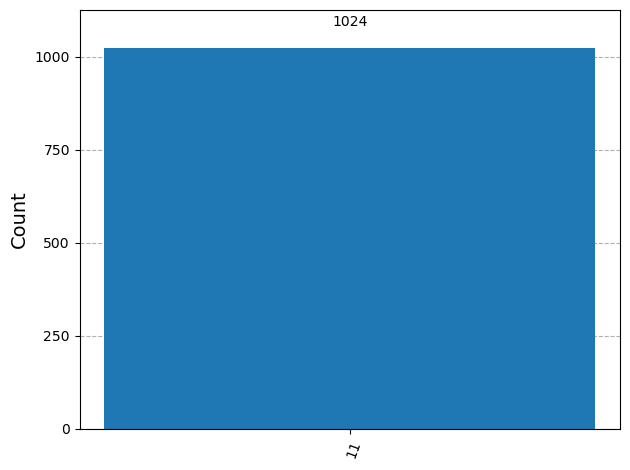

In [5]:
# Simulate
simulator = AerSimulator()
sampler = SamplerV2()
pm = generate_preset_pass_manager(optimization_level=1, backend=simulator)
transpiled = pm.run(qc)

job = sampler.run([transpiled], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()

print('Results:')
for state, count in sorted(counts.items(), key=lambda x: -x[1]):
    print(f'  |{state}⟩: {count} ({count/1024:.1%})')

plot_histogram(counts)

## 📊 Analysis

**Expected**: |11⟩ with ~100% probability  
**Why**: One iteration is optimal for N=4  

### Optimal Iterations
For N items with M solutions:
$$\text{iterations} \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}$$

For N=4, M=1: π/4 × √4 = π/4 × 2 ≈ 1.57 ≈ 1 iteration

## 🎓 3-Qubit Example

### Oracle: Mark |101⟩

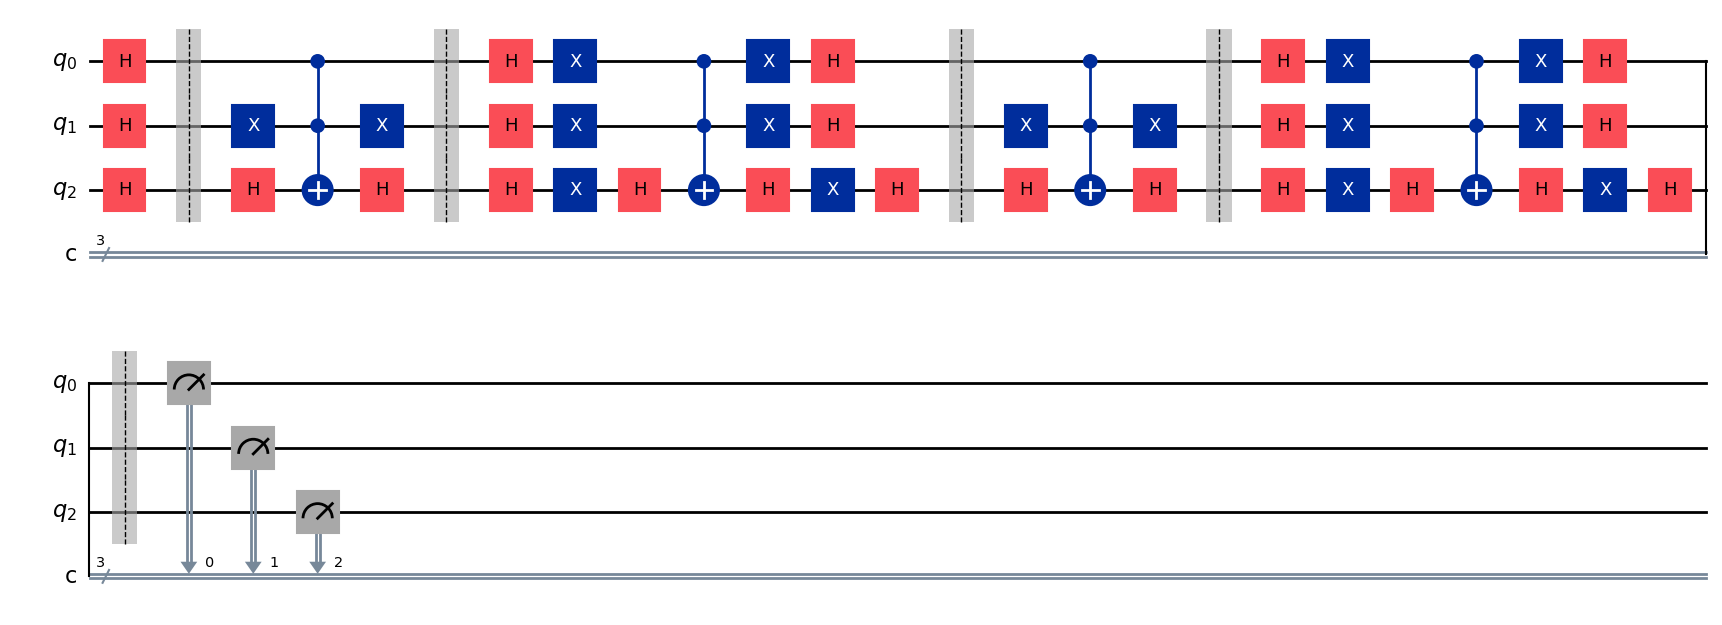

In [6]:
def oracle_3q_mark_101():
    """Mark |101⟩"""
    qc = QuantumCircuit(3)
    # Apply X to qubit 1 (middle qubit is 0 in |101⟩)
    qc.x(1)
    # Multi-controlled Z
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x(1)
    return qc

def diffusion_3q():
    """Diffusion for 3 qubits"""
    qc = QuantumCircuit(3)
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    return qc

# Build 3-qubit circuit
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.barrier()

# 2 iterations for N=8
for _ in range(2):
    qc3.compose(oracle_3q_mark_101(), inplace=True)
    qc3.barrier()
    qc3.compose(diffusion_3q(), inplace=True)
    qc3.barrier()

qc3.measure([0, 1, 2], [0, 1, 2])
qc3.draw('mpl')

### Execute 3-Qubit Search

3-Qubit Results:
  |101⟩: 953 (93.1%)
  |000⟩: 15 (1.5%)
  |111⟩: 13 (1.3%)


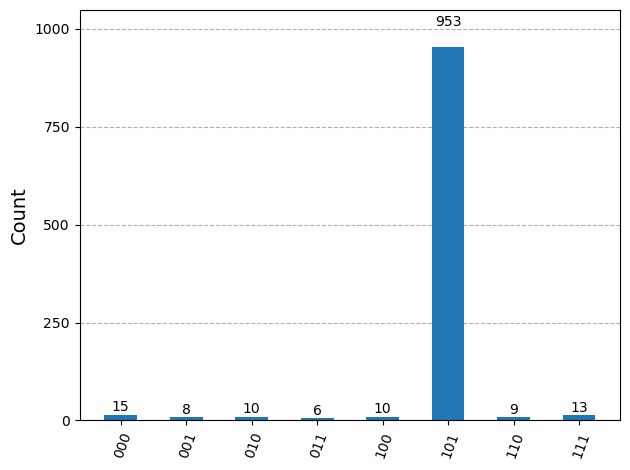

In [8]:
pm3 = generate_preset_pass_manager(optimization_level=1, backend=simulator)
transpiled3 = pm3.run(qc3)

job3 = sampler.run([transpiled3], shots=1024)
result3 = job3.result()
counts3 = result3[0].data.c.get_counts()

print('3-Qubit Results:')
for state, count in sorted(counts3.items(), key=lambda x: -x[1])[:3]:
    print(f'  |{state}⟩: {count} ({count/1024:.1%})')

plot_histogram(counts3)

## 💡 Key Insights

### Complexity Comparison
| Database Size (N) | Classical Queries | Quantum Queries | Speedup |
|------------------|-------------------|-----------------|----------|
| 4 | 2 | 1 | 2× |
| 16 | 8 | 2 | 4× |
| 256 | 128 | 8 | 16× |
| 1,000,000 | 500,000 | 500 | 1000× |

### Limitations
- Speedup is quadratic, not exponential
- Requires knowing number of solutions
- Needs amplitude amplification (delicate)
- Best for unstructured search

## 🎓 Exercises

### Exercise 1: Different Target (Easy)
Modify oracle to search for |10⟩ in 2-qubit example.

### Exercise 2: Multiple Solutions (Medium)
Create oracle marking both |101⟩ AND |110⟩. Calculate optimal iterations.

### Exercise 3: 4-Qubit Search (Hard)
Implement complete Grover for 4 qubits, marking |1010⟩.

## 📖 References

1. Grover, L.K. (1996). *A fast quantum mechanical algorithm for database search*. STOC '96.
2. Nielsen & Chuang, *Quantum Computation and Quantum Information*
3. Qiskit Textbook: https://learn.qiskit.org

---

**Version**: 2.2.0  
**License**: MIT